In [35]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [63]:
start_date='2015-04-01'
end_date='2023-4-23'
ticker='NVDA'
def rolling_strategy(s,e,tic,ma1,ma2):
    # suppress all warnings
    warnings.filterwarnings("ignore")
    df=yf.download(tic,start=start_date,end=end_date)
    price=df[['Adj Close']]
    price = price.rename(columns={'Adj Close': tic})

    MA1='MA{}'.format(str(ma1))
    MA2='MA{}'.format(str(ma2))
    price[MA1]=price[tic].rolling(window=ma1).mean()
    price[MA2]=price[tic].rolling(window=ma2).mean()
    price=price.dropna()
    price[[tic,MA1,MA2]].plot()
    price['Position']=np.where(price[MA1]>price[MA2],1,-1)
    detect=price['Position'].diff()
    flip_indices=price.index[detect!=0].to_list()
    print('Position changes at ',flip_indices)
    ax = price.plot(secondary_y='Position', figsize=(10, 6))
    ax.get_legend().set_bbox_to_anchor((0.25, 0.85))
    price['Return']=np.log(price[tic]/
                           price[tic].shift(1))
    price['Strategy']=price['Return'].shift(1)*price['Position']
    price.dropna(inplace=True)
    ret=np.exp(price[['Return','Strategy']].sum())
    std=price[['Return','Strategy']].std()*252**0.5
    # reset the warnings filter
    warnings.filterwarnings("default")
    print('Result for ',tic)
    print(ret)
    print(std)

[*********************100%***********************]  1 of 1 completed
Position changes at  [Timestamp('2016-01-14 00:00:00'), Timestamp('2018-11-06 00:00:00'), Timestamp('2019-08-12 00:00:00'), Timestamp('2022-04-18 00:00:00'), Timestamp('2023-01-24 00:00:00')]
Return       40.975626
Strategy    109.764710
dtype: float64
Return      0.495978
Strategy    0.495783
dtype: float64


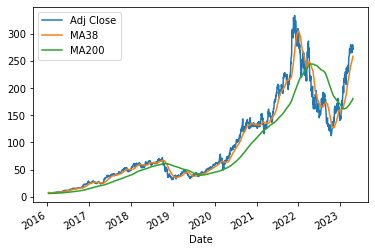

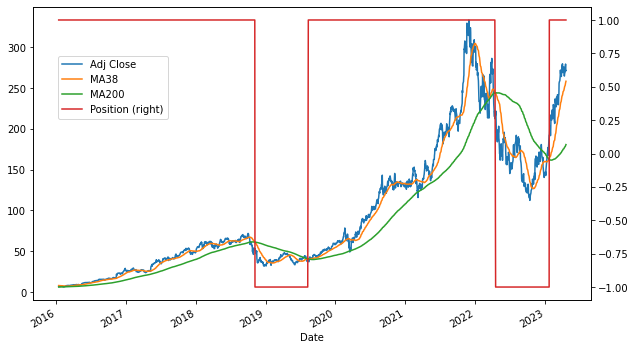

In [38]:
rolling_strategy(start_date,end_date,'NVDA',38,200)

In [65]:
def rolling_strategy_simp(df,ma1,ma2):
    # suppress all warnings
    warnings.filterwarnings("ignore")
    price=df[['Adj Close']]
    MA1='MA{}'.format(str(ma1))
    MA2='MA{}'.format(str(ma2))
    price[MA1]=price['Adj Close'].rolling(window=int(ma1)).mean()
    print(ma1,ma2)
    price[MA2]=price['Adj Close'].rolling(window=int(ma2)).mean()
    price=price.dropna()
    price['Position']=np.where(price[MA1]>price[MA2],1,-1)
    detect=price['Position'].diff()
    price['Return']=np.log(price['Adj Close']/
                           price['Adj Close'].shift(1))
    price['Strategy']=price['Return'].shift(1)*price['Position']
    price.dropna(inplace=True)
    ret=np.exp(price[['Strategy']].sum())
    std=np.exp(price[['Strategy']].std()*252**0.5)
    warnings.filterwarnings("default")
    return ret
#Optimization
from scipy.optimize import minimize

In [66]:
start_date='2015-04-01'
end_date='2023-4-23'
df_nv=yf.download('NVDA',start=start_date,end=end_date)
df_ap=yf.download('AAPL',start=start_date,end=end_date)
df_ms=yf.download('MSFT',start=start_date,end=end_date)
df_goo=yf.download('GOOGL',start=start_date,end=end_date)

df_amz=yf.download('AMZN',start=start_date,end=end_date)
df_lr=yf.download('LRCX',start=start_date,end=end_date)
# define the initial guess
x0 = [38, 200]
# define the bounds for the input variables
bounds = [(20, 60), (180, 230)]
# integer constraint
def integer_constraint(x):
    # custom constraint function that checks if the input variable is an integer
    return np.round(x) - x
constraints = [{'type': 'ineq', 'fun': integer_constraint}]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [76]:
# use the Nelder-Mead method to minimize the function
res_ms = minimize(lambda x: rolling_strategy_simp(df_ms,x[0],x[1]),x0, method='SLSQP',
               bounds=bounds, constraints=constraints)

# print the optimized values and the function value
print("MSFT Optimized values:", res_ms.x)
print("Function value:", res_ms.fun)

38.0 200.0
38.00000001490116 200.0
38.0 200.00000001490116
MSFT Optimized values: [ 38. 200.]
Function value: 5.343639604455027


In [75]:
# use the Nelder-Mead method to minimize the function
res_gog = minimize(lambda x: rolling_strategy_simp(df_goo,x[0],x[1]),x0, method='SLSQP',
               bounds=bounds, constraints=constraints)

# print the optimized values and the function value
print("Google Optimized values:", res_gog.x)
print("Function value:", res_gog.fun)

38.0 200.0
38.00000001490116 200.0
38.0 200.00000001490116
Google Optimized values: [ 38. 200.]
Function value: 1.474985123162515


In [69]:
# use the Nelder-Mead method to minimize the function
res_nv = minimize(lambda x: rolling_strategy_simp(df_nv,x[0],x[1]),x0, method='SLSQP',
               bounds=bounds, constraints=constraints)

# print the optimized values and the function value
print("NVDA Optimized values:", res_nv.x)
print("Function value:", res_nv.fun)

38.0 200.0
38.00000001490116 200.0
38.0 200.00000001490116
NVDA Optimized values: [ 38. 200.]
Function value: 109.76470850667913


In [70]:
# use the Nelder-Mead method to minimize the function
res_ap = minimize(lambda x: rolling_strategy_simp(df_ap,x[0],x[1]),x0, method='SLSQP',
               bounds=bounds, constraints=constraints)

# print the optimized values and the function value
print("Apple Optimized values:", res_ap.x)
print("Function value:", res_ap.fun)

38.0 200.0
38.00000001490116 200.0
38.0 200.00000001490116
Apple Optimized values: [ 38. 200.]
Function value: 2.470948183127802


In [71]:
# use the Nelder-Mead method to minimize the function
res_amz = minimize(lambda x: rolling_strategy_simp(df_amz,x[0],x[1]),x0, method='SLSQP',
               bounds=bounds, constraints=constraints)

# print the optimized values and the function value
print("Amazon Optimized values:", res_amz.x)
print("Function value:", res_amz.fun)

38.0 200.0
38.00000001490116 200.0
38.0 200.00000001490116
Amazon Optimized values: [ 38. 200.]
Function value: 3.931557877747737


In [72]:
# use the Nelder-Mead method to minimize the function
res_lr = minimize(lambda x: rolling_strategy_simp(df_lr,x[0],x[1]),x0, method='SLSQP',
               bounds=bounds, constraints=constraints)

# print the optimized values and the function value
print("LRCX Optimized values:", res_lr.x)
print("Function value:", res_lr.fun)

38.0 200.0
38.00000001490116 200.0
38.0 200.00000001490116
LRCX Optimized values: [ 38. 200.]
Function value: 4.2070348842901275


[*********************100%***********************]  1 of 1 completed
Position changes at  [Timestamp('2016-01-14 00:00:00'), Timestamp('2016-06-17 00:00:00'), Timestamp('2016-07-26 00:00:00'), Timestamp('2019-02-01 00:00:00'), Timestamp('2019-02-26 00:00:00'), Timestamp('2022-03-09 00:00:00'), Timestamp('2023-03-09 00:00:00')]
Result for  MSFT
Return      6.266580
Strategy    5.001632
dtype: float64
Return      0.281351
Strategy    0.281862
dtype: float64
[*********************100%***********************]  1 of 1 completed
Position changes at  [Timestamp('2016-01-14 00:00:00'), Timestamp('2018-11-07 00:00:00'), Timestamp('2019-08-13 00:00:00'), Timestamp('2022-04-14 00:00:00'), Timestamp('2023-01-24 00:00:00')]
Result for  NVDA
Return       40.975626
Strategy    105.326926
dtype: float64
Return      0.495978
Strategy    0.495812
dtype: float64
[*********************100%***********************]  1 of 1 completed
Position changes at  [Timestamp('2016-01-14 00:00:00'), Timestamp('2016-08-

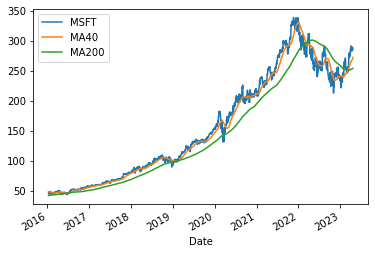

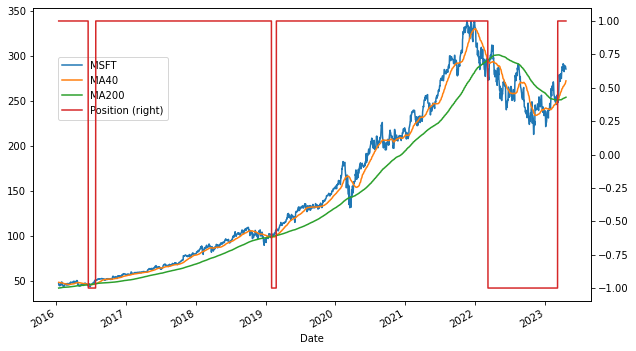

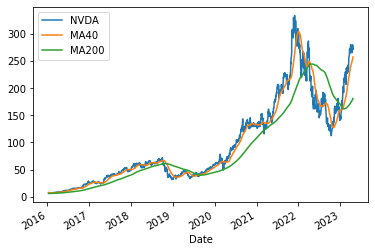

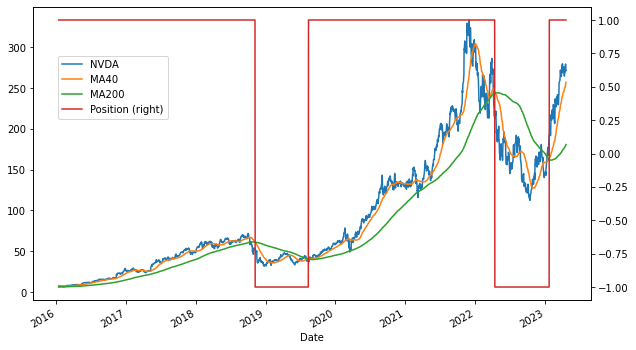

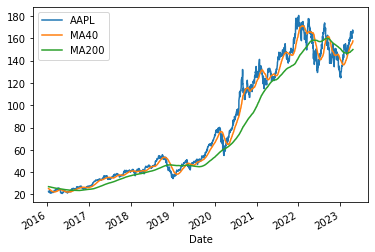

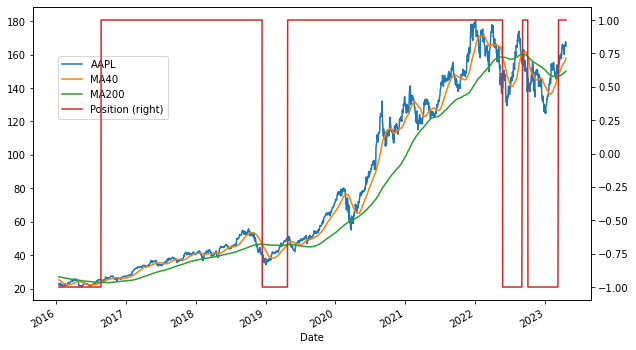

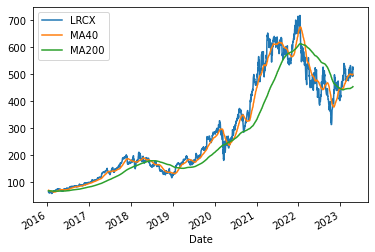

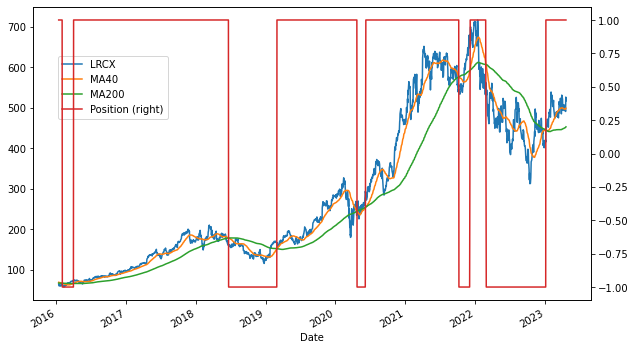

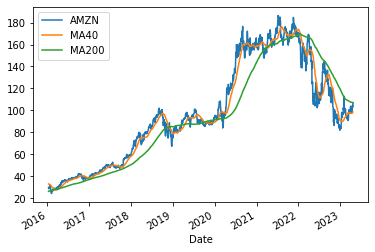

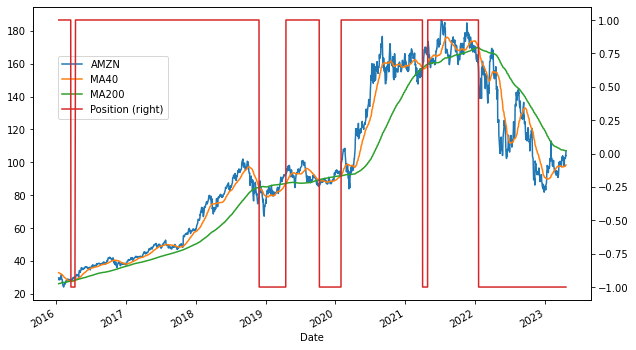

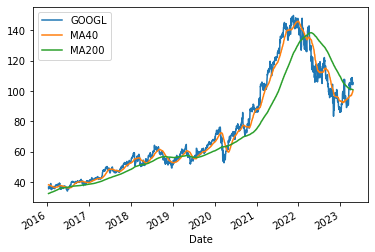

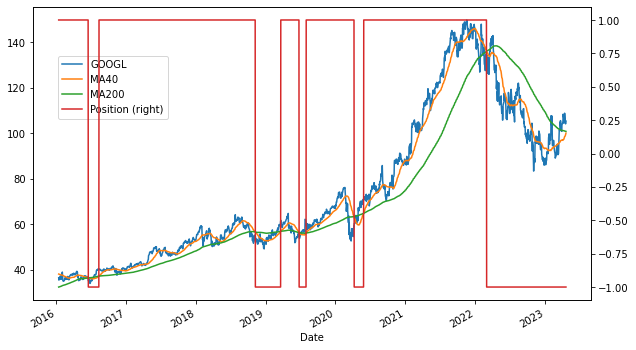

In [73]:
tickers=['MSFT','NVDA','AAPL','LRCX','AMZN','GOOGL']
for tic in tickers:
    rolling_strategy(start_date,end_date,tic,38,200)